In [1]:
import facenet
import umar_classifier
import real_time_face_recognition

In [2]:
train_dir="./train"
test_dir="./test"
all_data_dir="./alldata"
classifier_dir="./my_classifier.pkl"
model_dir="./model/20170511-185253.pb"

In [3]:
#TRAINING
umar_classifier.train_classify(data_dir=all_data_dir,classifier_filename=classifier_dir,use_split_dataset=True,model=model_dir,nrof_train_images_per_class=30)

Number of classes: 12
Number of images: 360
Loading feature extraction model
Model Loading :  4.443243980407715
Calculating features for images
Feature Extraction :  5.570727109909058
Training classifier
Training Time :  0.08349442481994629
Saved classifier model to file "./my_classifier.pkl"


In [6]:
#CLASSIFICATION
umar_classifier.train_classify(data_dir=all_data_dir,classifier_filename=classifier_dir,use_split_dataset=True,model=model_dir,nrof_train_images_per_class=30,mode='CLASSIFY')

Number of classes: 12
Number of images: 476
Loading feature extraction model
Model Loading :  4.319787979125977
Calculating features for images
Feature Extraction :  4.899343490600586
Testing classifier
Loaded classifier model from file "./my_classifier.pkl"
   0  aishwarya rai: 0.899
   1  angelina jolie: 0.439
   2  aishwarya rai: 0.923
   3  aishwarya rai: 0.809
   4  aishwarya rai: 0.882
   5  aishwarya rai: 0.846
   6  aishwarya rai: 0.848
   7  aishwarya rai: 0.742
   8  aishwarya rai: 0.947
   9  aishwarya rai: 0.887
  10  aishwarya rai: 0.952
  11  aishwarya rai: 0.933
  12  aishwarya rai: 0.754
  13  aishwarya rai: 0.816
  14  aishwarya rai: 0.892
  15  aishwarya rai: 0.898
  16  aishwarya rai: 0.830
  17  aishwarya rai: 0.669
  18  aishwarya rai: 0.914
  19  aishwarya rai: 0.861
  20  aishwarya rai: 0.884
  21  aishwarya rai: 0.744
  22  aishwarya rai: 0.437
  23  aishwarya rai: 0.843
  24  aishwarya rai: 0.793
  25  aishwarya rai: 0.805
  26  aishwarya rai: 0.872
  27  aishw

In [2]:
#REAL TIME RECOGNITION
real_time_face_recognition.start_recognition(mode='phone')


Enter IP Address = 123.123.123
socket timed out - URL %s , Please Make Sure you are sharing same IP or Hotspot within devices http://123.123.123/shot.jpg


error: /tmp/build/80754af9/opencv_1512491964794/work/modules/highgui/src/window.cpp:605: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvDestroyAllWindows


In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
labels=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
best_class_indices=[ 0,0 , 0 , 0,  0,  0,  0,  0 , 0,  0,  0,  0,  0,  0 , 0,  0,  0 , 0 , 0 , 0,  0,  0,  0,  0,0,  0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1  ,1 , 1,  1 , 1 , 1  ,1 , 1 , 1 , 1 , 1 , 1,  1,  1 , 1 , 1 , 1 , 1 , 1 , 1,  1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 ,1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1,  1,  1 , 1 , 6 , 1  ,1  ,1  ,1  ,1 , 1 , 1 , 1 , 1 , 1  ,1  ,1  ,1 , 1,  7,  2,  2 , 2 , 2,2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2  ,2 , 2 , 2 , 2 , 2 , 2 , 2 , 2,2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3,  3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3,  3 , 3 , 3 , 3 , 3 , 3 , 4 , 4,  4,  4,  4,  4,  4 , 4 , 4 , 4 , 4 , 4 , 4  ,4  ,4  ,4  ,4  ,4, 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4  ,4  ,4  ,4  ,4,  4 , 5  ,5  ,5  ,3  ,5  ,5  ,5  ,5  ,5  ,5,  5,  5,  5 , 5 , 5 , 5 , 5 , 5  ,5  ,5 , 5 , 5 , 5 , 5  ,5  ,5  ,5  ,5,  5,  5 , 5  ,6  ,6  ,6,  6 , 6 , 6 , 6 , 6  ,6  ,6  ,6  ,6 , 3 , 1 , 6 , 6  ,6  ,6 , 6 , 6 , 3 , 6 , 6 , 6  ,6  ,6  ,6,  6 , 6 , 6 , 6 , 6  ,6  ,6  ,7  ,7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7  ,7  ,7  ,7,  0,  7,  7,  7,  7 , 7  ,7,  7,  7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7  ,7  ,7 , 7,  7,  7 , 7,  3,  7,  7 , 7 , 8,  8,  8,  8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 ,10 , 8 , 8 , 8,  8 , 8 , 8 , 8 , 8 , 8 , 8,  8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8  ,8  ,9  ,9  ,9  ,9  ,9 , 9 , 9,  9  ,9 , 9,  9 , 9 , 9 , 9 , 9  ,9  ,9,  9  ,9  ,9  ,9  ,9  ,9  ,9 , 9 , 9 , 9 , 9 , 9 , 9  ,9,  9 , 9  ,9  ,9,  9,  9 , 9 , 9 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10,10, 10, 10 ,10 ,10 ,10 ,11 ,11 ,11 ,11 ,11 ,11, 11, 11, 11, 11 ,11 ,11 ,11, 11 ,11 ,11 ,11 ,11, 11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 , 7 ,11 ,11 ,11 ,11 ,11, 11, 11, 11, 11]
print(len(labels))
print(len(best_class_indices))
class_names=['aishwarya_rai','angelina_jolie','ar_rahman','barack_obama','bill_gates','donald_trump','elon_musk','katrina_kaif','narendra_modi','shahrukh_khan','umar_hassan','virat_kohli']

476
476


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("a.jpg",dpi=500)
    plt.show()

Confusion matrix, without normalization
[[32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  1  1  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 30  0  0  0  0  0  0]
 [ 0  1  0  2  0  0 31  0  0  0  0  0]
 [ 1  0  0  1  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 37  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 37]]


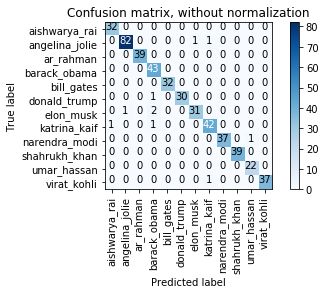

In [10]:
cnf_matrix = confusion_matrix(labels, best_class_indices)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix

#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
 #                     title='Normalized confusion matrix')
